# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/gen_prof_7000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep7000_0,gencell_ep7000_1,gencell_ep7000_2,gencell_ep7000_3,gencell_ep7000_4,gencell_ep7000_5,gencell_ep7000_6,gencell_ep7000_7,gencell_ep7000_8,gencell_ep7000_9,⋯,gencell_ep7000_490,gencell_ep7000_491,gencell_ep7000_492,gencell_ep7000_493,gencell_ep7000_494,gencell_ep7000_495,gencell_ep7000_496,gencell_ep7000_497,gencell_ep7000_498,gencell_ep7000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,4.742817,4.971684,5.803797,4.397883,4.703249,4.771570,4.345284,4.690338,5.489762,4.623732,⋯,4.896479,4.720076,4.537606,5.381168,4.793319,4.742911,4.590595,4.249534,4.416814,4.903556
Cd47,4.353237,4.851807,6.208016,5.547793,4.024966,4.401123,5.679213,3.945500,5.561995,5.389030,⋯,5.140428,4.188169,5.255744,5.757504,4.521784,4.354327,5.136207,5.901235,5.478519,4.706733
Elmo2,4.279574,4.685840,4.997702,5.889855,3.937213,4.338675,6.035361,3.828661,4.720762,5.285247,⋯,4.855817,4.095465,5.448621,4.918680,4.521991,4.286458,5.261338,6.220232,5.779303,4.707089
Crip2,4.317524,5.728961,6.084650,6.203475,3.673453,4.423682,6.257731,3.532064,5.716225,6.563064,⋯,6.120669,4.015547,6.133333,6.061421,4.610050,4.338370,6.140691,6.325804,6.205338,5.439379
Pprc1,5.911924,4.733803,4.385964,4.760228,7.075862,5.751951,4.773293,7.245664,4.482134,4.635716,⋯,4.689406,6.387901,4.725281,4.497216,5.536539,5.856456,4.728489,4.780380,4.767012,5.050182
Ccdc174,4.603325,4.675465,4.522884,6.013084,4.561797,4.611191,6.222517,4.545843,4.597158,5.199334,⋯,4.698055,4.574352,5.431777,4.611702,4.652113,4.604554,5.212267,6.626347,5.899991,4.687716


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Rplp1, Perp, Rps29, Rps3a1, Actb, B2m, Hspb1, Fau, Lgals7, Sbsn 
	   Dmkn, Rpl32, Rpl4, Sdc4, Anxa8, Klf4, Anxa2, Fam25c, Krt15, Krt10 
	   S100a11, Tmsb4x, Sfn, Krtdap, Rpl19, Ly6d, Fos, Rps12, Apoe, Calm4 
Negative:  Smco1, Rbm15, Fn1, Galk1, Pfas, Fads1, Ruvbl2, Eno1, Tonsl, Spats2 
	   Basp1, Pdpn, Spc24, Pola2, Lamb1, 4930579G24Rik, Nmrk1, Hmmr, Pxdn, Dcdc2c 
	   Glipr1, Tnfrsf10b, Gpr137b, Zfp825, Krit1, Cyp20a1, Rab31, Fscn1, Als2, Mad2l1 
PC_ 2 
Positive:  Acer1, Klk8, Ptgs1, Nupr1, Cldn4, Orm1, Crabp2, Ly6g6e, Sprr1a, Ly6g6c 
	   Psapl1, Ephx3, Skint6, Agpat4, Skint3, Clu, Spink5, Lipm, Ly6d, Zfp750 
	   Tmprss4, Krtdap, Acsbg1, Gm94, Cst6, 2200002D01Rik, Cyp2j6, Ptgr1, Krt10, Tmem45a 
Negative:  Plec, Atp6v0c, Rpl34, Rpl30, Bcam, Raly, Hnrnpa1, Morf4l1, Dmd, Ltbp4 
	   Mob1a, Usp50, Dennd1a, Ucp2, Oaz1, Foxo3, Ubap2l, Cdh3, Bnc2, Rab7 
	   Leng8, Plch2, Elk4, Itm2c, Tmsb10, Gtf2ird1, Cad, Tnpo1, Elmo2, Eno1 
PC_ 3 
Positive:  Cct2, Rpl4, Fth1, Psmb1, Actb, G

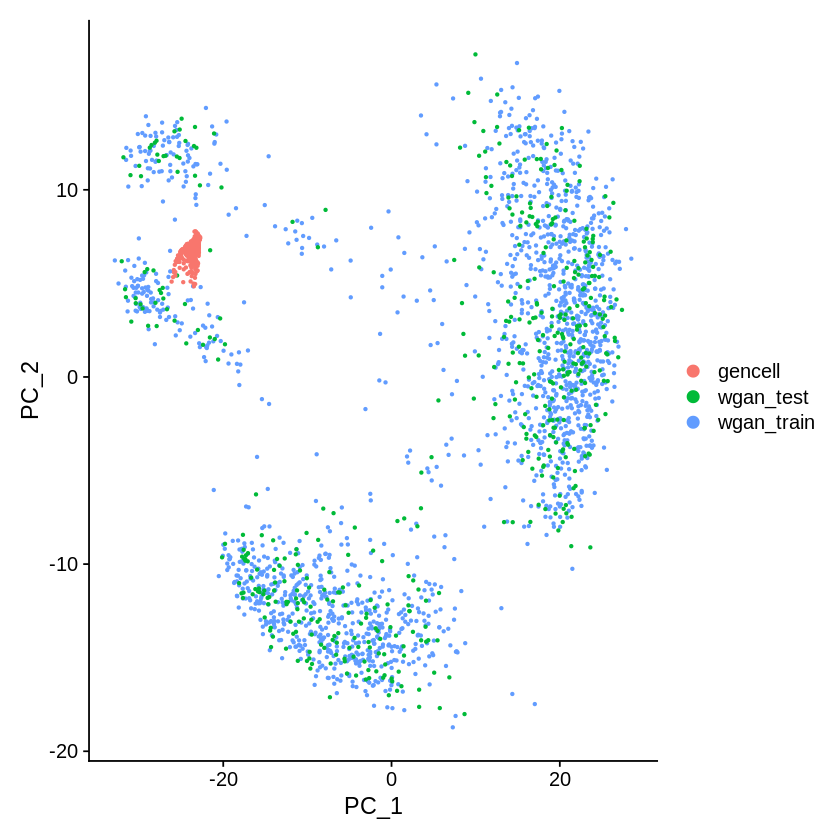

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

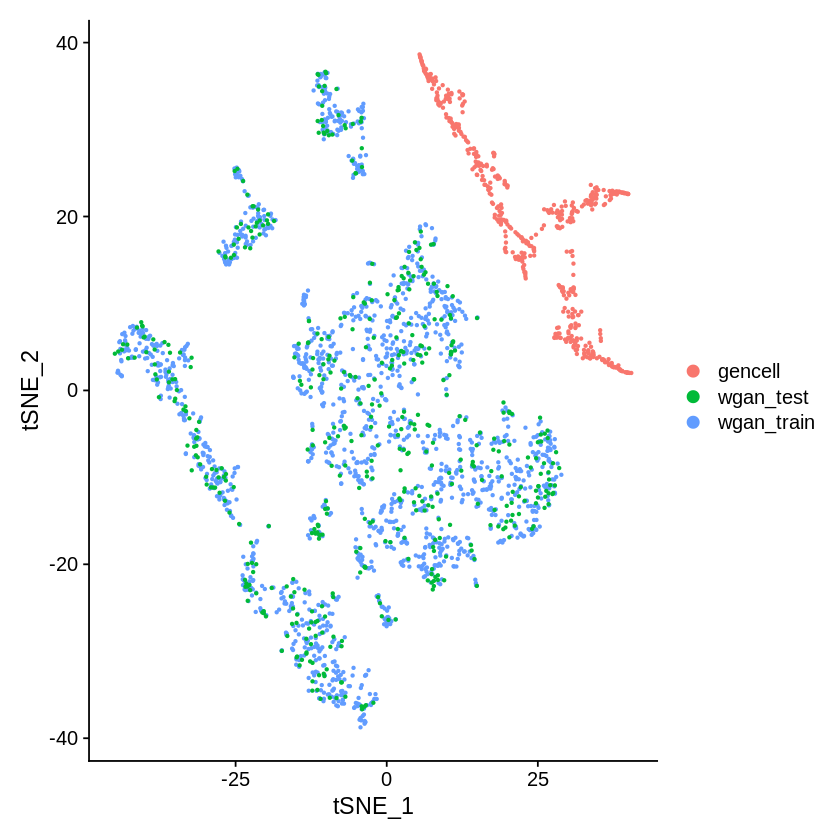

In [19]:
DimPlot(data_combined, reduction = "tsne")